*@author Laura María Pedraza Gómez*

## Dataset Titanic

### División del conjunto de datos

Se va a dividir el dataset en conjunto de datos de entrenamiento y conjunto de datos de prueba

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

dt = pd.read_csv('Titanic-Dataset.csv')

# Predicción de supervivencia
x = dt.drop('Survived', axis=1)  # Variables independientes
y = dt['Survived']               # Variable dependiente

# Datos de entrenamiento - 80%
# Datos de prueba - 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)


Tamaño del conjunto de entrenamiento: (712, 11)
Tamaño del conjunto de prueba: (179, 11)


### Eliminación de filas de nulos

In [31]:
print("Número de filas antes de eliminar nulos:", df.shape[0])

# Se eliminan las filas que contienen al menos un valor nulo
dt = dt.dropna()

print("Número de filas después de eliminar nulos:", df.shape[0])

Número de filas antes de eliminar nulos: 183
Número de filas después de eliminar nulos: 183


Dado que el dataset del Titanic contiene información histórica, es común encontrar datos faltantes en muchas filas debido a registros incompletos o pérdidas de información con el tiempo.

### Rellenar nulos con media y mediana

In [79]:
# Se vuelve a cargar el dataset para obtener todos los datos
dt = pd.read_csv('Titanic-Dataset.csv')

# Mostrar cuántos valores nulos hay en cada columna
print("Valores nulos antes del tratamiento: \n", dt.isnull().sum())

# Se rellenan algunos posible nulos con la media
if 'Age' in dt.columns:
    dt['Age'] = dt['Age'].fillna(dt['Age'].mean())

if 'Fare' in dt.columns:
    dt['Fare'] = dt['Fare'].fillna(dt['Fare'].mean())

# Se rellenan el resto de posibles nulos con la mediana
if 'SibSp' in dt.columns:
    dt['SibSp'] = dt['SibSp'].fillna(dt['SibSp'].median())

if 'Parch' in dt.columns:
    dt['Parch'] = dt['Parch'].fillna(dt['Parch'].median())

# Comprobar nuevamente los nulos
print("\n \n Valores nulos después del tratamiento: \n", dt.isnull().sum())


Valores nulos antes del tratamiento: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 
 Valores nulos después del tratamiento: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Los datos nulos de la columna 'Cabin' no pueden rellenarse en este apartado, ya que no son numéricos y además presentan muchos valores faltantes, lo que dificulta su tratamiento adecuado. En cuanto a 'Embarked', aunque es una variable categórica y tiene pocos valores nulos, estos deben tratarse antes del análisis, normalmente rellenándolos con el valor más frecuente (moda).

### Eliminación de atributos con nulos

In [43]:
# Se vuelve a cargar el dataset
dt = pd.read_csv("Titanic-Dataset.csv")

print("Columnas antes de eliminar las que tenían nulos:", dt.columns)
print("\n Valores nulos antes del tratamiento: \n", dt.isnull().sum())

# Eliminar columnas que contienen al menos un valor nulo
dt = dt.dropna(axis=1)

print("\n \nColumnas después de eliminar las que tenían nulos:", dt.columns)
print("\n Valores nulos después del tratamiento: \n", dt.isnull().sum())

Columnas antes de eliminar las que tenían nulos: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Valores nulos antes del tratamiento: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 
Columnas después de eliminar las que tenían nulos: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

 Valores nulos después del tratamiento: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


Se puede ver que las columnas de 'Age', 'Cabin' y 'Embarked' se han eliminado.

### Rellenar de nulos con media y mediana mediante Imputer de Sklearn

In [51]:
from sklearn.impute import SimpleImputer

dt = pd.read_csv("Titanic-Dataset.csv")

# Se obtienen las columnas que son numéricas
columnasNumericas = dt.select_dtypes(include=["float64", "int64"]).columns

print("Nulos antes de aplicar media:\n", dt.isnull().sum())

# Se rellena los nulos con media
imputadorMedia = SimpleImputer(strategy='mean')
dtMedia = dt.copy()
dtMedia[columnasNumericas] = imputadorMedia.fit_transform(dt[columnasNumericas])


print("\n \n Nulos tras aplicar media:\n", dtMedia.isnull().sum())


Nulos antes de aplicar media:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 
 Nulos tras aplicar media:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [53]:
dt = pd.read_csv("Titanic-Dataset.csv")
columnasNumericas = dt.select_dtypes(include=["float64", "int64"]).columns

print("\n Nulos antes de aplicar mediana:\n", dt.isnull().sum())

# Se rellenan los nulos con mediana
imputadorMediana = SimpleImputer(strategy='median')
dtMediana = dt.copy()
dtMediana[columnasNumericas] = imputadorMediana.fit_transform(dt[columnasNumericas])

print("\n \n Nulos tras aplicar mediana:\n", dtMediana.isnull().sum())


 Nulos antes de aplicar mediana:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 
 Nulos tras aplicar mediana:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Transformación de atributos categóricos a numéricos mediante One-Hot Encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

dt = pd.read_csv("Titanic-Dataset.csv")

# Convertimos los atributos categóricos a tipo category
# El nombre no se incluye debido a que no aporta valor al modelo
dt['Sex']=dt['Sex'].astype('category')
dt['Cabin']=dt['Cabin'].astype('category')
dt['Embarked']=dt['Embarked'].astype('category')

# Asignamos valores numéricos en nuevas columnas
dt['Sex_new']=dt['Sex'].cat.codes
dt['Cabin_new']=dt['Cabin'].cat.codes
dt['Embarked_new']=dt['Embarked'].cat.codes

# Creamos una instancia de OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(dt[['Sex_new', 'Cabin_new', 'Embarked_new']]).toarray())

print(enc_data)

     0    1    2    3    4    5    6    7    8    9    ...  144  145  146  \
0    0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
886  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
887  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
888  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
889  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
890  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     147  148  149  150  151  152  153  
0    0.0  0.0  0.0  0.0  0.0  0.0 

### Escalación de atributos mediante RobustScaler

In [73]:
from sklearn.preprocessing import RobustScaler

dt = pd.read_csv("Titanic-Dataset.csv")
columnasNumericas = dt.select_dtypes(include=["float64", "int64"]).columns

# Inicializar el escalador
scaler = RobustScaler()

# Aplicar el escalado
dtScaled = dt.copy()
dtScaled[columnasNumericas] = scaler.fit_transform(dt[columnasNumericas])

# Mostrar comparación antes y después en una columna, por ejemplo 'Fare'
print("Valores originales de 'Fare':\n", dt['Fare'].head())
print("\n \nValores escalados de 'Fare':\n", dtScaled['Fare'].head())

Valores originales de 'Fare':
 0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

 
Valores escalados de 'Fare':
 0   -0.312011
1    2.461242
2   -0.282777
3    1.673732
4   -0.277363
Name: Fare, dtype: float64


### Transformador y pipe para visualización

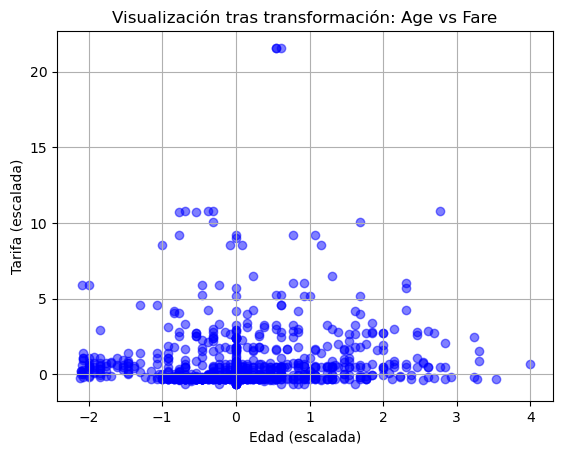

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

dt = pd.read_csv("Titanic-Dataset.csv")
columnasNumericas = dt.select_dtypes(include=["float64", "int64"]).columns

# Crear el transformador para columnas numéricas
transformadorNumerico = Pipeline(steps=[
    ("imputador", SimpleImputer(strategy="median")),     
    ("escalador", RobustScaler())                       
])

# Combinar todo en un ColumnTransformer
preprocesamiento = ColumnTransformer(transformers=[
    ("numerico", transformadorNumerico, columnasNumericas)
])

# Aplicar transformación
dtProcesado = preprocesamiento.fit_transform(dt)

# Convertir a DataFrame para poder visualizar
dtProcesado = pd.DataFrame(dtProcesado, columns=columnasNumericas)

# Ejemplo de visualización con Age vs Fare
plt.scatter(dtProcesado["Age"], dtProcesado["Fare"], alpha=0.5, c='blue')
plt.xlabel("Edad (escalada)")
plt.ylabel("Tarifa (escalada)")
plt.title("Visualización tras transformación: Age vs Fare")
plt.grid(True)
plt.show()